# Pymaceuticals Inc.
---

### Analysis

- Before performing an analysis, the data needed to be cleaned. This was done by removing duplicates that could skew our data. Based on the analysis below, it can be seen that the drug regimen "Capomulin" most effectively decreased tumor volume in mice over a period of time (about 40 days). Tumor volume and mouse weight showed a positive correlation with a R-square value of .71.  When observing the individual tumor volume to timepoint ratio, a trend of a decrease in volume can be seen in all the mice that were given Capomulin compared to the other treatment regimens. Ramicane also came close in comparison, and can possibly be looked to as a potential alternative to Capomulin.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata,  on=["Mouse ID"], how= "left")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
Mice_count = mouse_study["Mouse ID"].nunique()
Mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Getthe duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dupes

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = mouse_study.drop_duplicates(subset=['Mouse ID'], keep= 'last')
clean_df = mouse_study[mouse_study['Mouse ID'].isin(dupes) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen = clean_df.groupby("Drug Regimen")
print(drug_regimen)
# Assemble the resulting series into a single summary DataFrame.
Sum_Stats = drug_regimen['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Sum_Stats = Sum_Stats.rename(columns={'mean':"Mean Tumor Volume",'median':'Median Tumor Volume',"var":"Tumor Volume Variance","std":"Tumor Volume Std. Dev." ,"sem":"Tumor Volume Std. Err."})
Sum_Stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Sum_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Deviation='std',
    Tumor_Volume_SEM='sem'
)
print(Sum_stats)

              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Deviation  Tumor_Vol

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

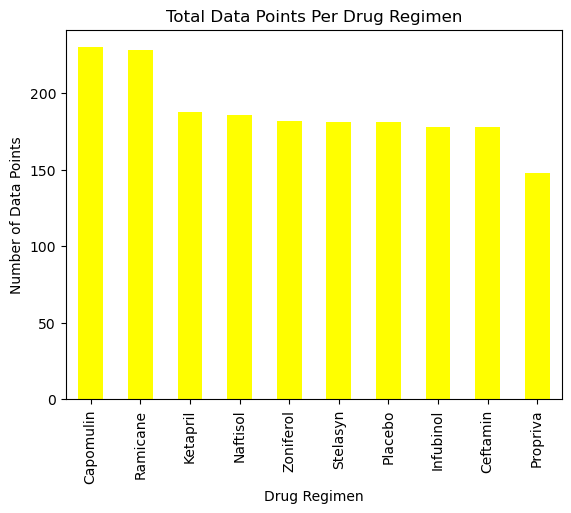

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = clean_df['Drug Regimen'].value_counts()

drug_regimen_count.plot(kind='bar', color = 'yellow')
plt.title('Total Data Points Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel ('Number of Data Points')

In [9]:
drug_regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

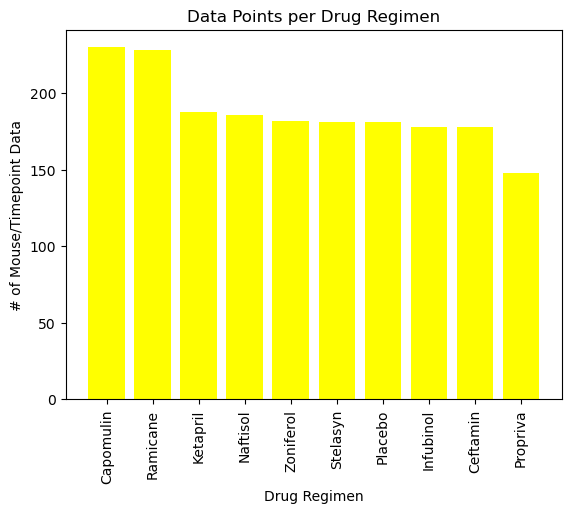

<Figure size 1000x600 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_regimen_count.index
y_axis = drug_regimen_count.values
plt.xticks(rotation=90)
plt.title('Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mouse/Timepoint Data')
plt.bar(x_axis, y_axis, color = 'yellow')
plt.figure(figsize=(10,6))


<Axes: ylabel='count'>

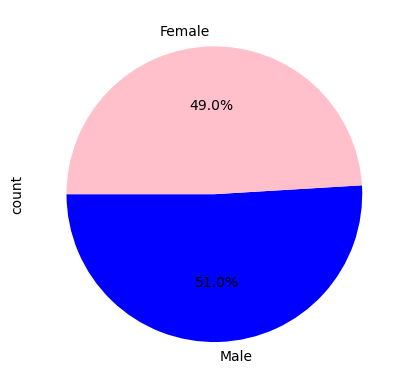

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df['Sex'].value_counts()
colors = ['blue','pink']
sex_count.plot(kind='pie', colors=colors, autopct="%1.1f%%", startangle=180)



([<matplotlib.patches.Wedge at 0x18281701950>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

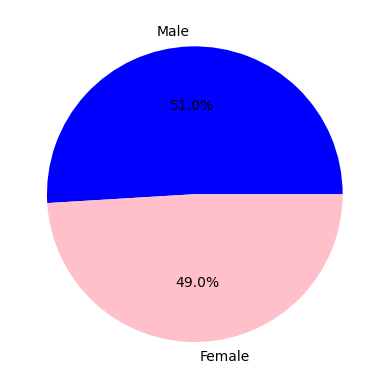

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotplt.title('Data Points per Drug Regimen')
#plt.xlabel('Drug Regimen')
#plt.ylabel('# of Mouse/Timepoint Data')
x_axis = sex_count.index
y_axis = sex_count.values
colors = ['blue','pink']
plt.pie(y_axis, colors=colors, labels=x_axis, autopct="%1.1f%%", startangle=0)

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
all_final_tumor_volume = pd.merge(max_timepoint,clean_df, on=['Mouse ID','Timepoint'], how ='left')
#final_tumor_volume = all_final_tumor_volume[all_final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

print(all_final_tumor_volume)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20  

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in treatment_regimens:
    subset = all_final_tumor_volume[all_final_tumor_volume['Drug Regimen'] == treatment]
    tumor_vol = subset['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol.quantile([.25, .75])
lower = quartiles[.25]    
upper = quartiles[.75]     
IQR = upper - lower

# Determine outliers using upper and lower bounds
lower_bound = lower - 1.5 * IQR
upper_bound = upper + 1.5 * IQR
outliers= subset[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]   
print(f'IQR:         {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

IQR:         15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999


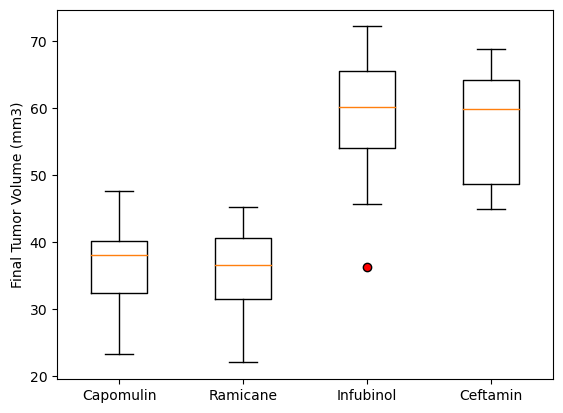

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot with potential outliers highlighted
flierprops = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')
ax.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops=flierprops)
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

In [37]:
import random

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin["Mouse ID"]
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouseID = capomulin['Mouse ID'].sample(n=1)
print(mouseID)

'''Run this cell again to get a different mouse's tumor volume over time'''

1849    s185
Name: Mouse ID, dtype: object


"Run this cell again to get a different mouse's tumor volume over time"

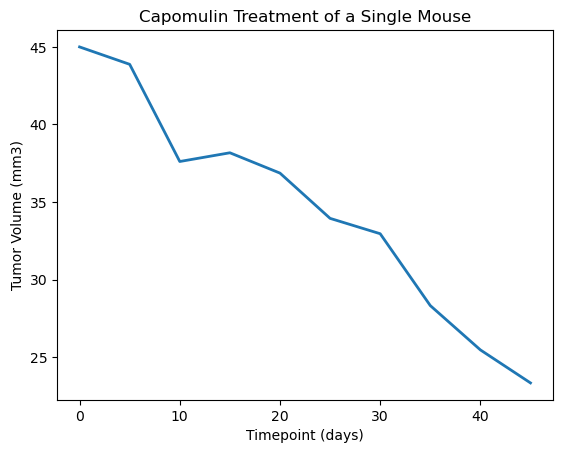

'This data belongs to Mouse ID: 1849    s185\nName: Mouse ID, dtype: object'

In [38]:
tumor_volume = capomulin['Tumor Volume (mm3)'].loc[capomulin['Mouse ID']=='s185']
time_point = capomulin['Timepoint'].loc[capomulin['Mouse ID']=='s185']

# Create a line plot of tumor volume vs. time point
plt.plot(time_point, tumor_volume, linewidth=2)
# Add labels and a title to the plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of a Single Mouse")
plt.show()
(f'This data belongs to Mouse ID: {mouseID}')

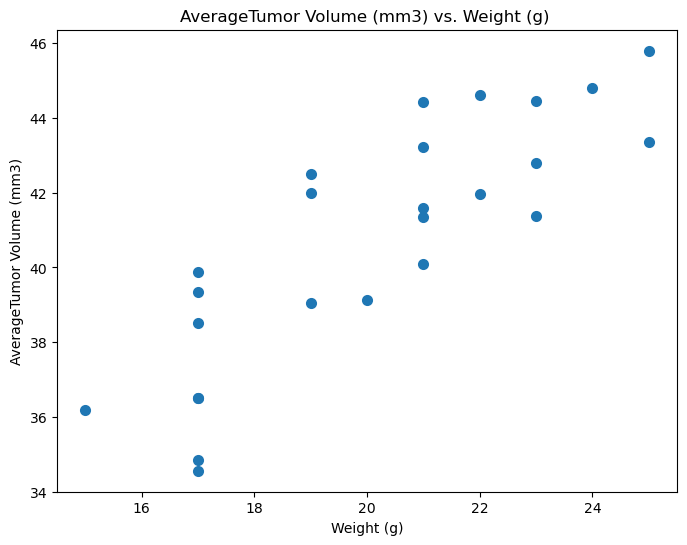

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
mouse_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
avg_tum_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tum_vol, linewidth=2)
plt.title("AverageTumor Volume (mm3) vs. Weight (g) ")
plt.xlabel("Weight (g)")
plt.ylabel("AverageTumor Volume (mm3)")
plt.show()


## Correlation and Regression

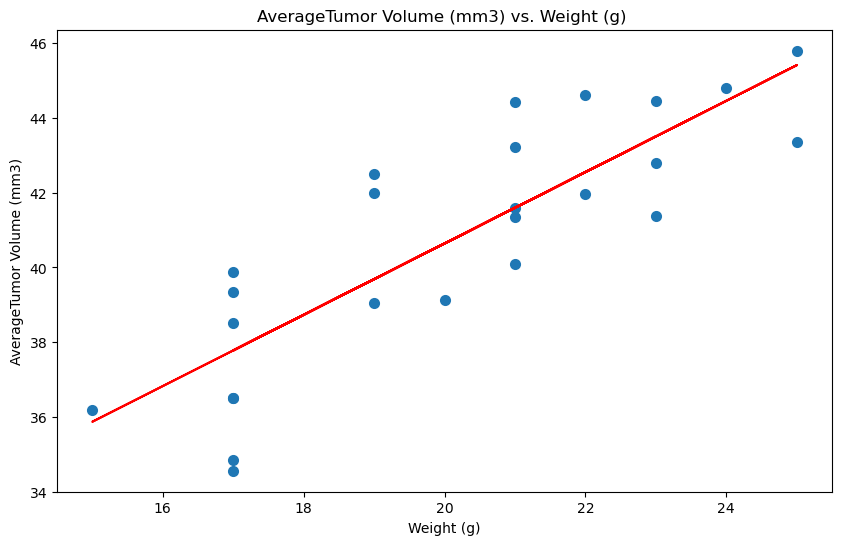

The correlation between both factors is 0.84
Linear Regression Results:
Slope: 0.95
Intercept: 21.55
R-squared Value: 0.71


In [32]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight,avg_tum_vol)
(slope, intercept, r_value, p_value, std_err) = linregress(mouse_weight, avg_tum_vol)
regress_values = mouse_weight * slope + intercept


plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tum_vol, linewidth=2)
plt.plot(mouse_weight,regress_values ,"r-")
plt.title("AverageTumor Volume (mm3) vs. Weight (g) ")
plt.xlabel("Weight (g)")
plt.ylabel("AverageTumor Volume (mm3)")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"Linear Regression Results:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared Value: {r_value**2:.2f}")